In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
def funcion_emg(nombre):
    # Abrir el archivo de texto
    with open(nombre, "r") as f:
        # Saltar las tres primeras líneas
        next(f)
        next(f)
        next(f)
        
        # Leer todas las líneas restantes
        all_data = f.readlines()   
    
    # Procesar cada línea, dividiendo por tabulaciones
    all_data = [line.strip().split('\t') for line in all_data]
    
    # Extraer la primera columna (muestra)
    sample = [int(row[0]) for row in all_data]  # Primera columna

    # Crear una secuencia de números para la muestra (opcional, según tu lógica)
    sample = np.arange(0, len(sample))  # Reemplaza los valores por una secuencia 0, 1, 2, ..., n
    
    # Extraer la sexta columna (amplitud)
    amplitude = [int(row[5]) for row in all_data]  # Sexta columna (índice 5)
    amplitude = np.array(amplitude)
    return sample, amplitude  # Devolver los valores de la muestra y amplitud
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def fourier(s_filtrada):
    T=1/1000
    frequencies = np.fft.fftfreq(len(s_filtrada[:]), T)
    signal_fft = np.fft.fft(s_filtrada[:])
    # Solo tomamos la parte positiva de la transformada
    positive_frequencies = frequencies[:len(frequencies)//2]
    positive_signal_fft = np.abs(signal_fft[:len(signal_fft)//2])
    return positive_frequencies,positive_signal_fft



def grafica(sample, amplitude, filtrada):
    plt.figure(figsize=(12, 6))

    # Gráfico de la señal original
    plt.subplot(1, 2, 1)
    plt.plot(sample / 1000, amplitude)
    plt.title('Señal EMG Original')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')

    # Gráfico de la señal filtrada
    plt.subplot(1, 2, 2)
    plt.plot(sample / 1000, filtrada)
    plt.title('Señal EMG Filtrada')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud Filtrada')

    plt.tight_layout()
    plt.show()

    # Comparar la Transformada de Fourier de la señal original y la filtrada
    frecuencia_original, signalFFT_original = fourier(amplitude)
    frecuencia_filtrada, signalFFT_filtrada = fourier(filtrada)

    plt.figure(figsize=(12, 6))

    # Comparación de las transformadas de Fourier
    plt.subplot(1, 2, 1)
    plt.plot(frecuencia_original, signalFFT_original)
    #plt.plot(frecuencia_filtrada, signalFFT_filtrada, label='Filtrada')
    plt.ylim(min(signalFFT_original),max(signalFFT_filtrada))
    plt.title('Sin filtrar Transformada de Fourier')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud')
    plt.legend()

    # Comparación en dB
    plt.subplot(1, 2, 2)
    plt.plot(frecuencia_filtrada,signalFFT_filtrada, label='Filtrada (dB)')
    plt.title('Transformada de Fourier  (Filtrada)')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud ')

    plt.tight_layout()
    plt.show()

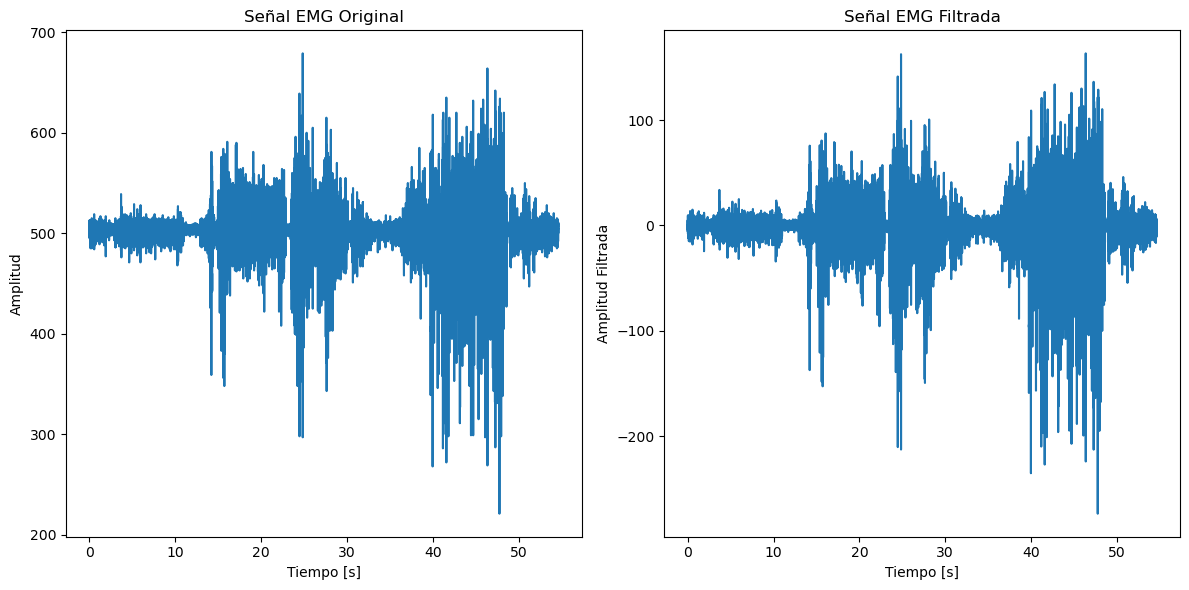

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


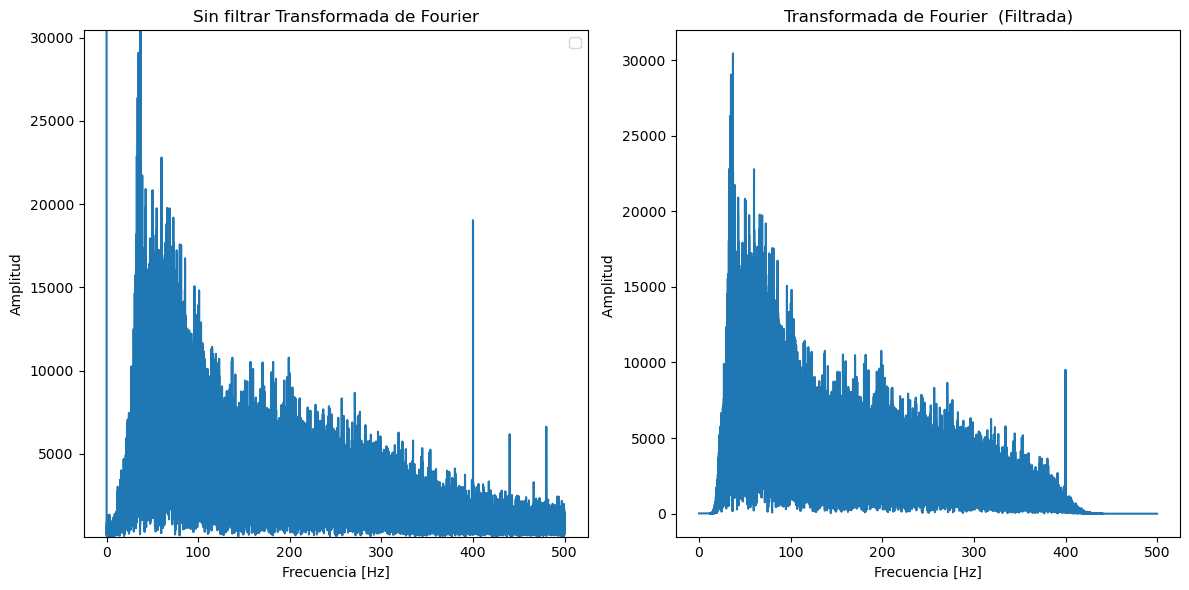

In [7]:
## Medicion 1 --> flexion analizar
sample, amplitude = funcion_emg("david pantorrilla 1.txt")
filtrada = butter_bandpass_filter(amplitude, 20, 400, 1000.0, 5)
grafica(sample,amplitude,filtrada)

In [13]:
## Medicion 4 (completa)
sample, amplitude = funcion_emg("pp4.txt")
filtrada = butter_bandpass_filter(amplitude, 2, 400, 1000.0, 5)
grafica(sample,amplitude,filtrada)

NameError: name 'funcion_emg' is not defined

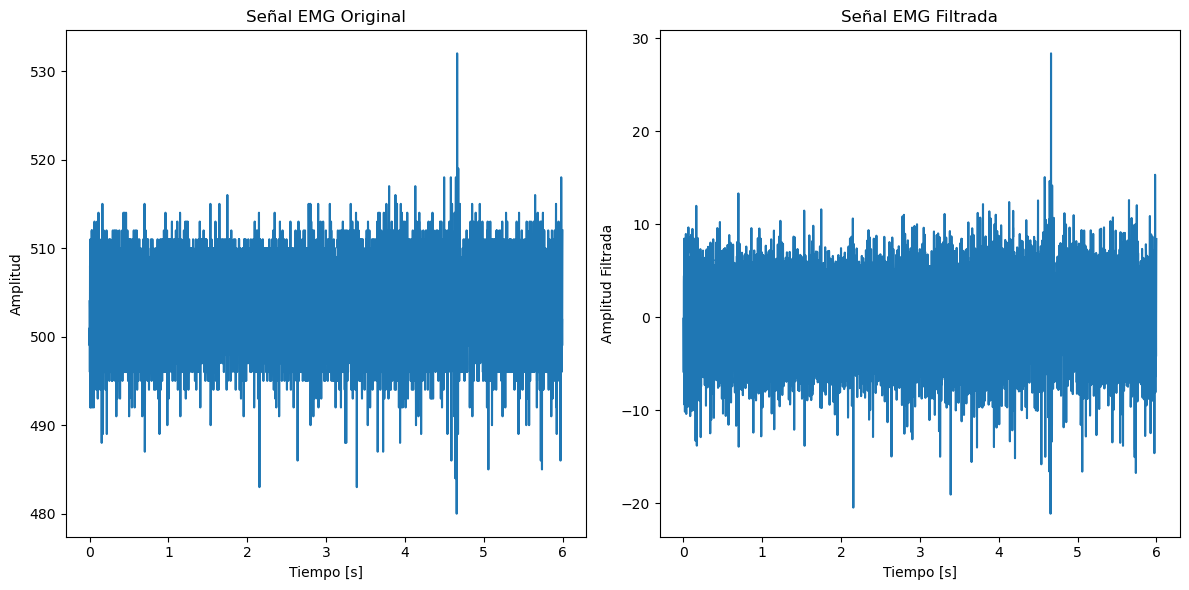

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


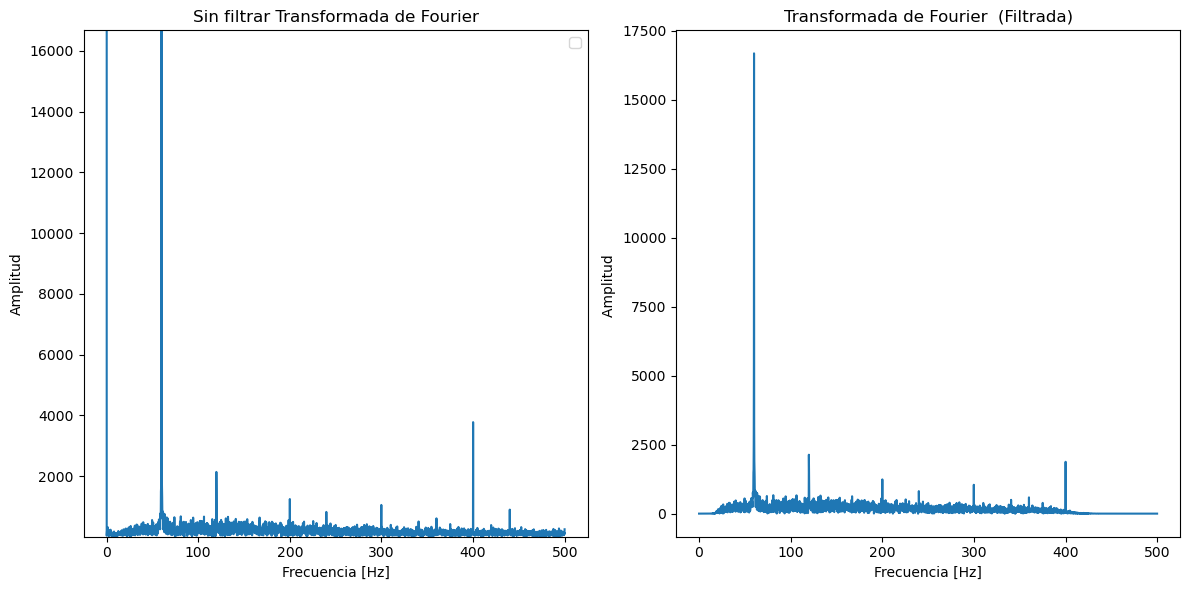

In [31]:
## reposo TOMA 4
grafica(sample[:6000],amplitude[0:6000],filtrada[0:6000])


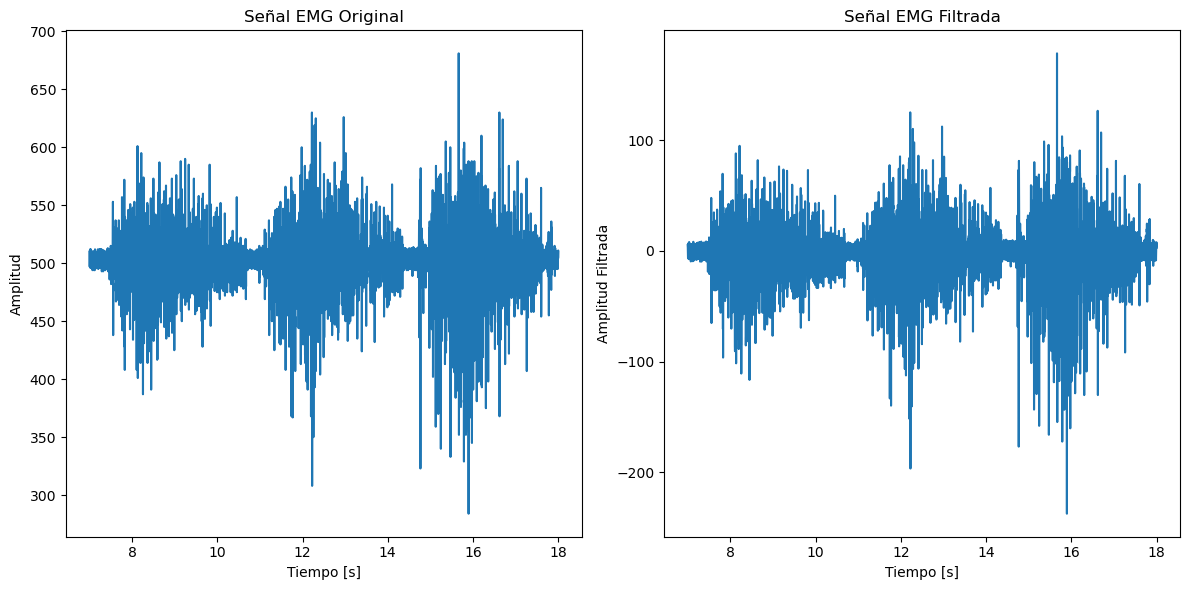

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


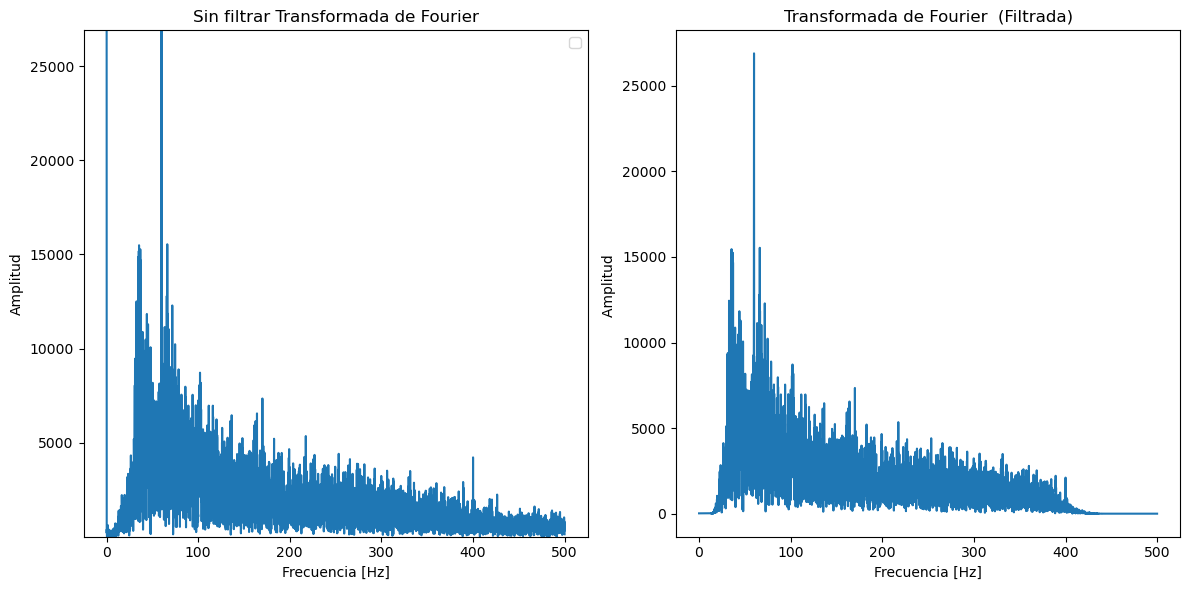

In [33]:
#fLEXION TOMA 4
grafica(sample[7000:18000],amplitude[7000:18000],filtrada[7000:18000])

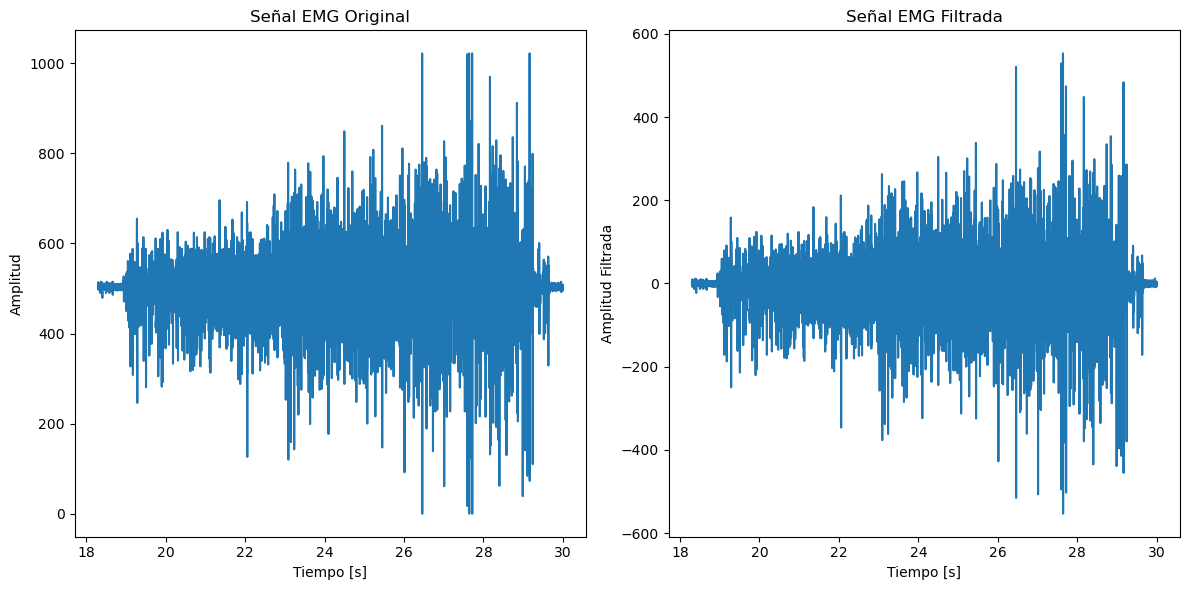

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


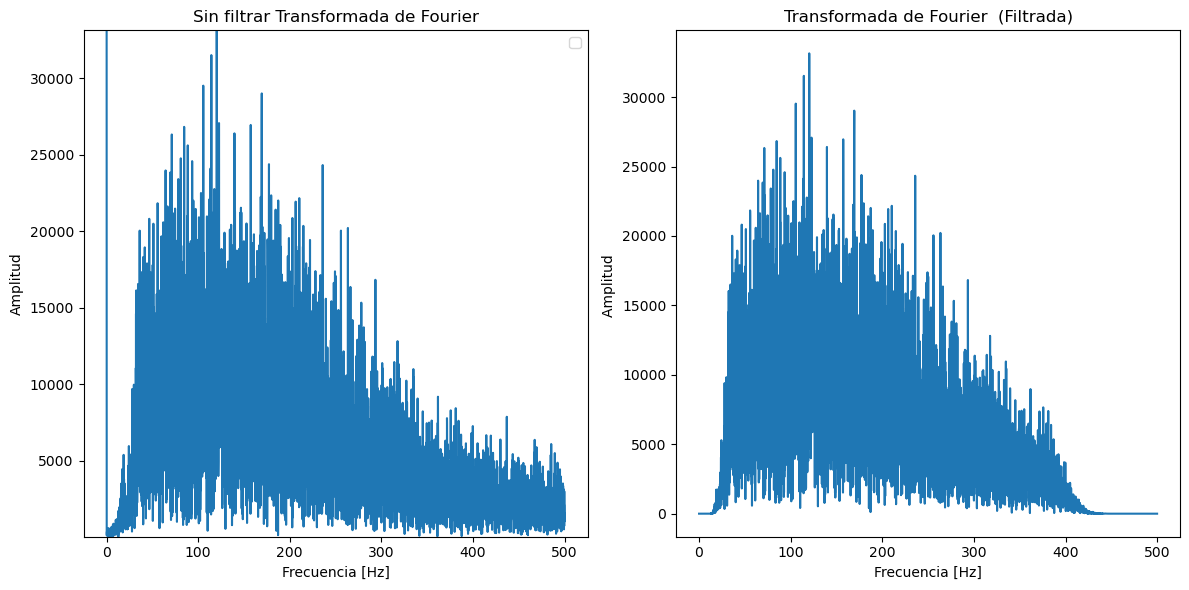

In [36]:
##MEDICION MAXIMO ESFUERZO
grafica(sample[18300:30000],amplitude[18300:30000],filtrada[18300:30000])

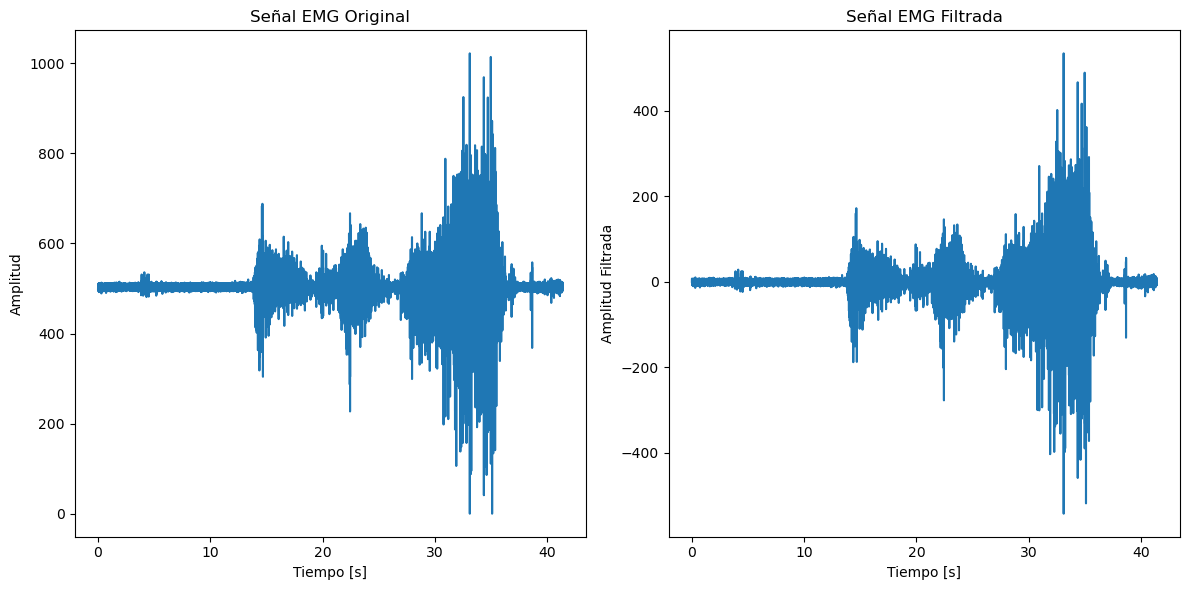

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


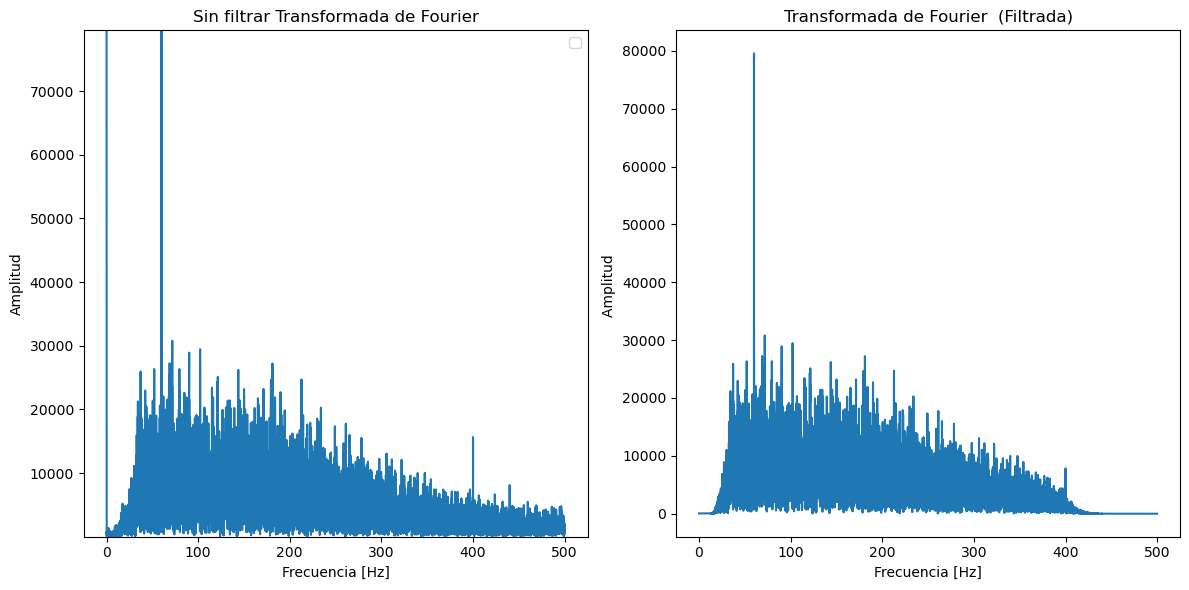

In [44]:
## medicion 3 general
sample, amplitude = funcion_emg("gemelo3.txt")
filtrada = butter_bandpass_filter(amplitude, 20, 400, 1000.0, 5)
grafica(sample,amplitude,filtrada)

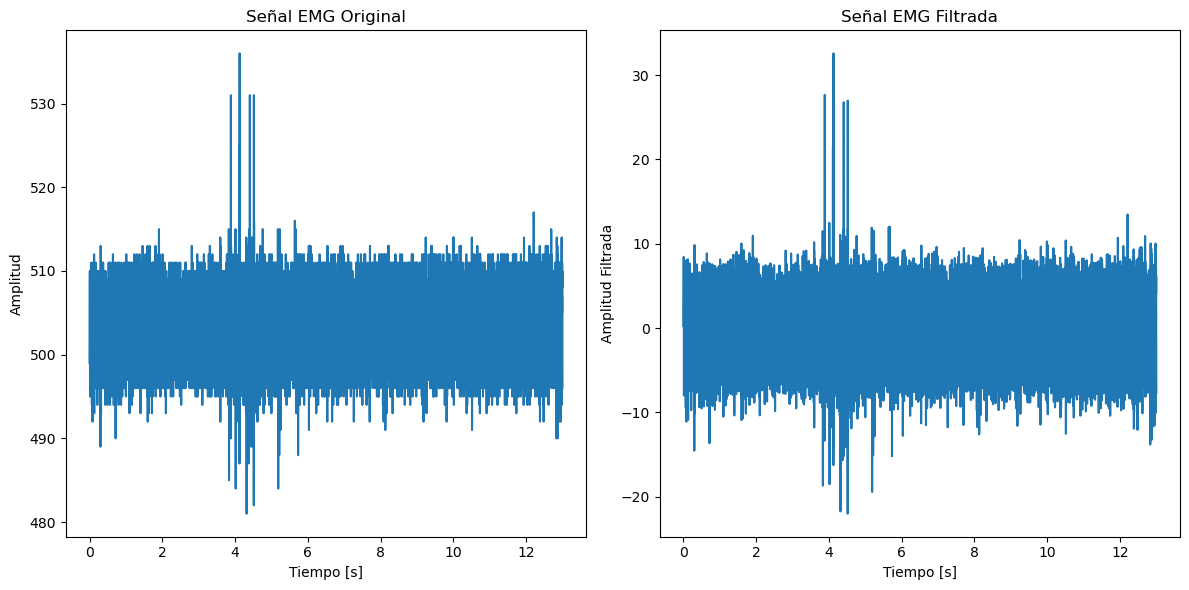

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


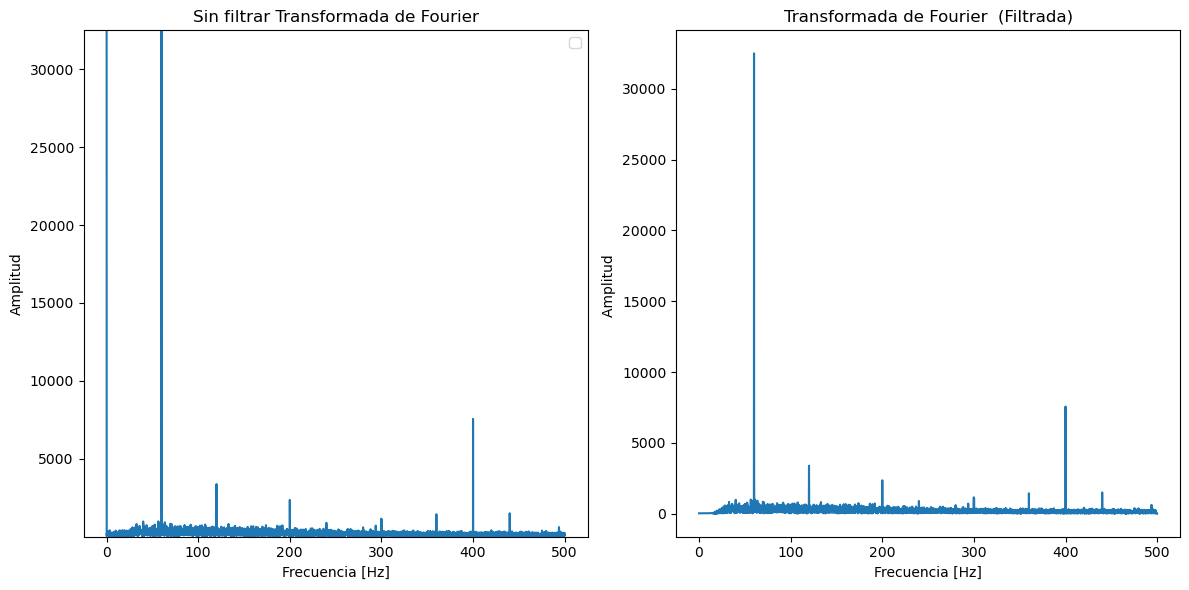

In [69]:
## reposo medicion 3
sample, amplitude = funcion_emg("gemelo3.txt")
filtrada = butter_bandpass_filter(amplitude, 20, 499, 1000.0, 5)
grafica(sample[0:13000],amplitude[0:13000],filtrada[0:13000])

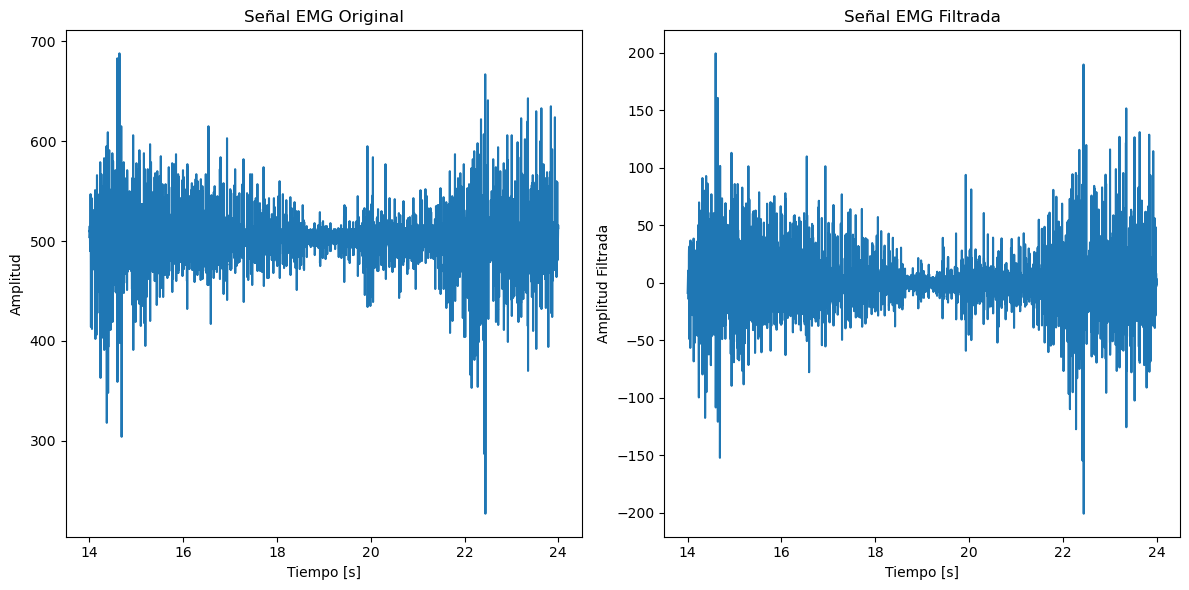

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


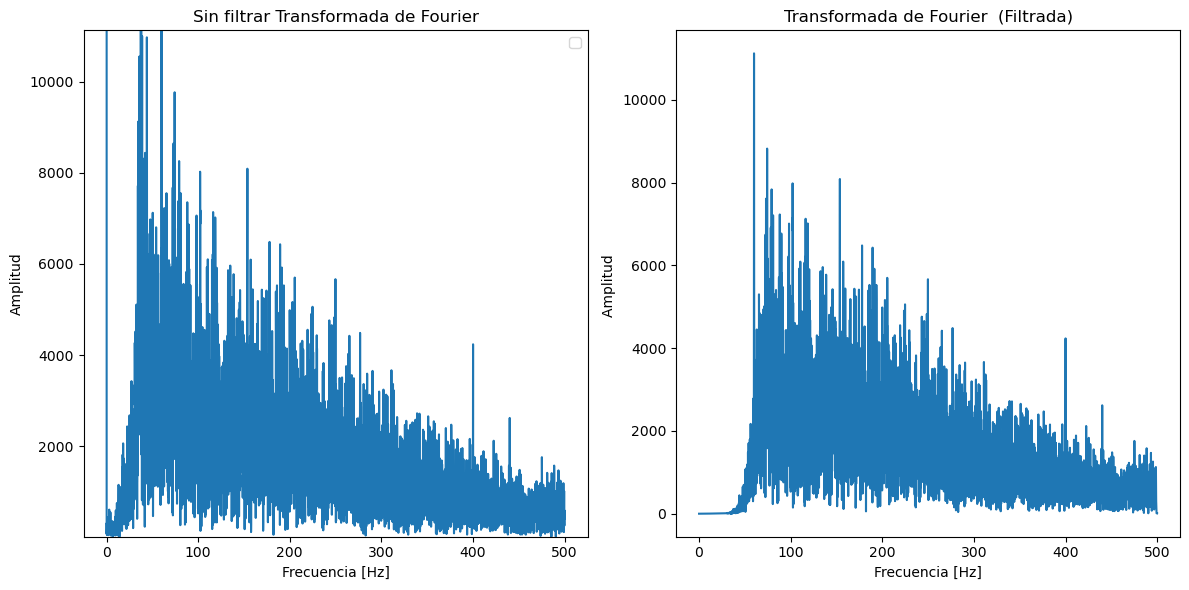

In [67]:
## flexion medicion 3
sample, amplitude = funcion_emg("gemelo3.txt")
filtrada = butter_bandpass_filter(amplitude, 60, 499, 1000.0, 5)
grafica(sample[14000:24000],amplitude[14000:24000],filtrada[14000:24000])

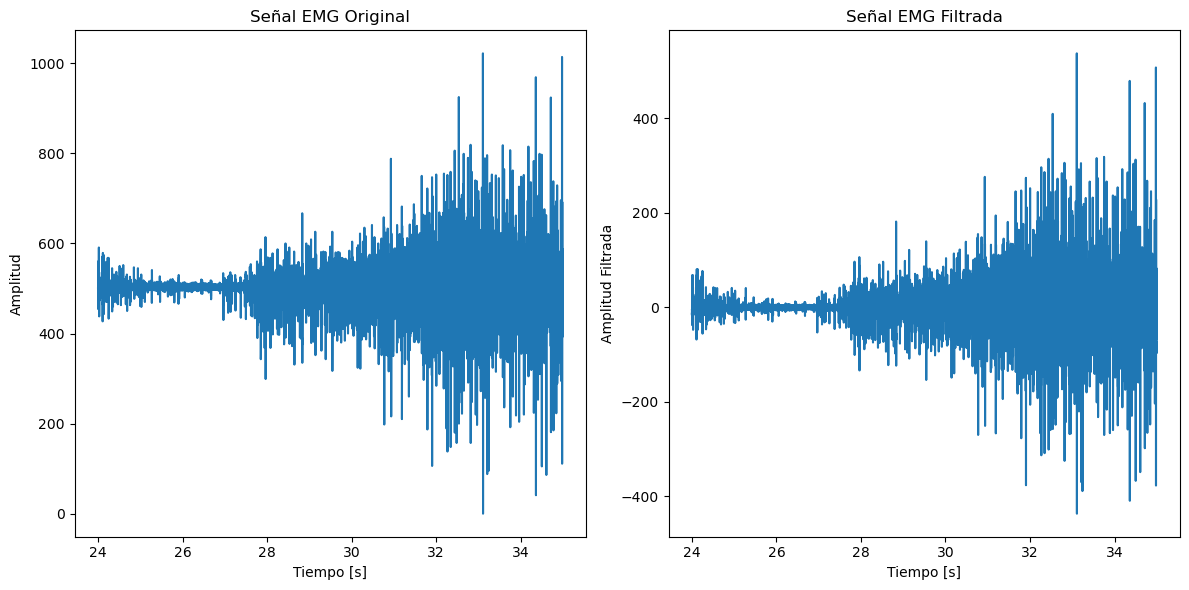

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


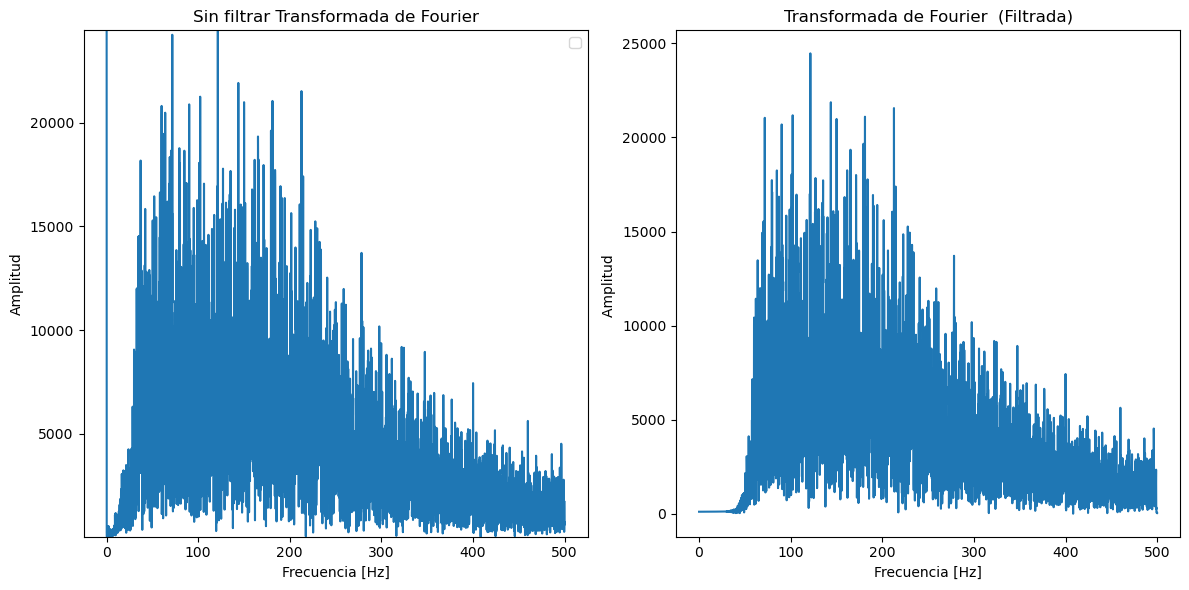

In [68]:
## MAXIMA medicion 3
sample, amplitude = funcion_emg("gemelo3.txt")
filtrada = butter_bandpass_filter(amplitude, 60, 499, 1000.0, 5)
grafica(sample[24000:35000],amplitude[24000:35000],filtrada[24000:35000])

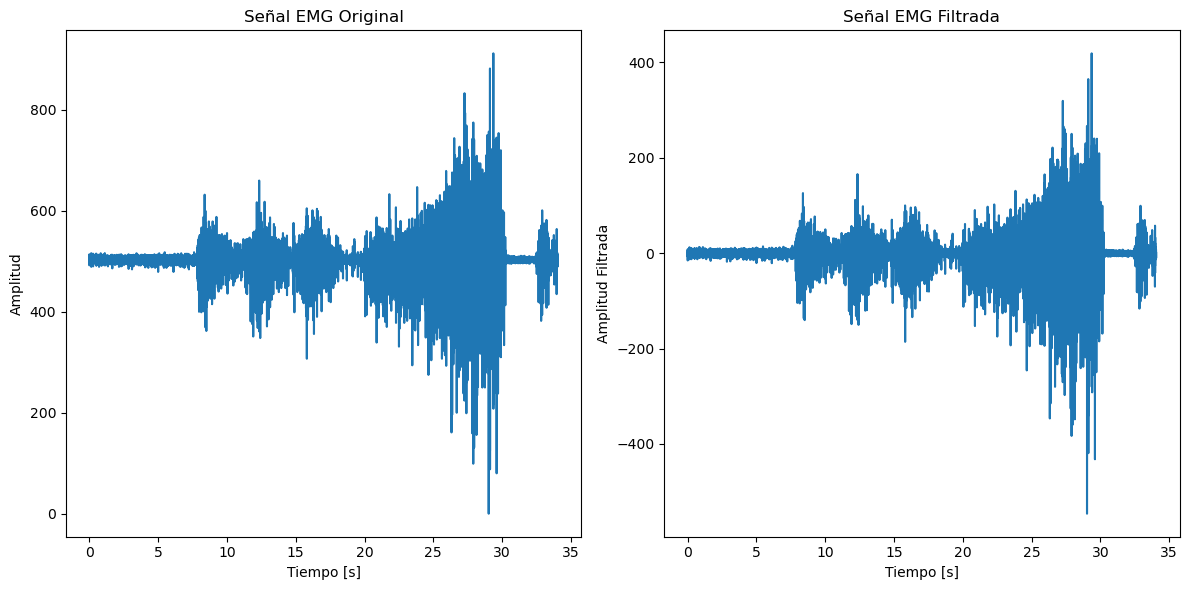

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


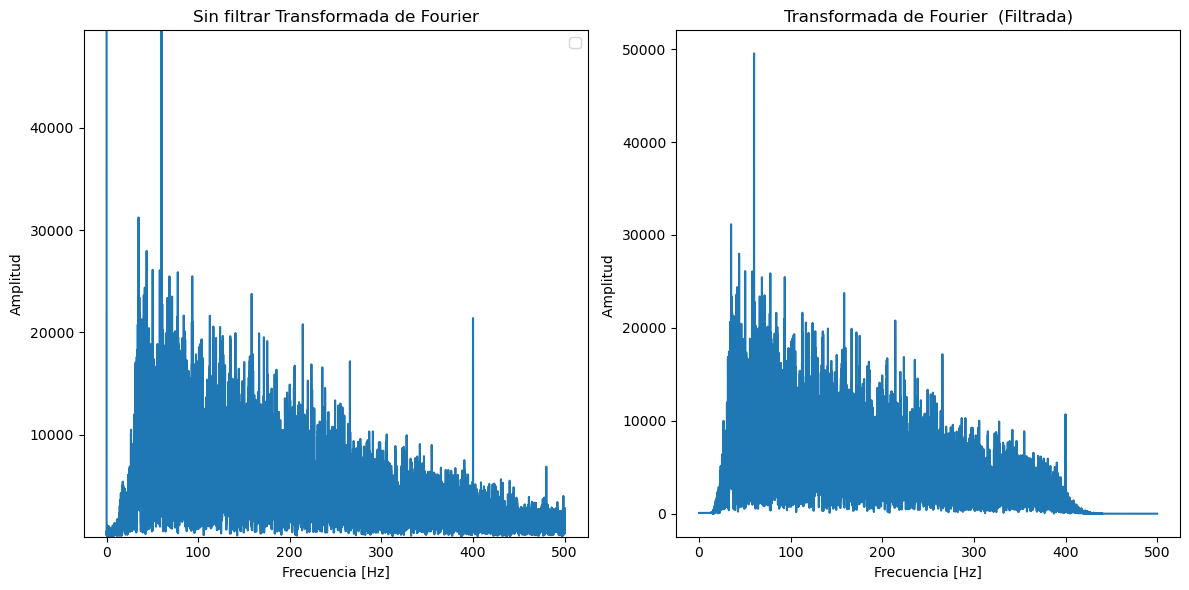

In [58]:
## medicion 3 general
sample, amplitude = funcion_emg("gemelo2.txt")
filtrada = butter_bandpass_filter(amplitude, 20, 400, 1000.0, 5)
grafica(sample,amplitude,filtrada)

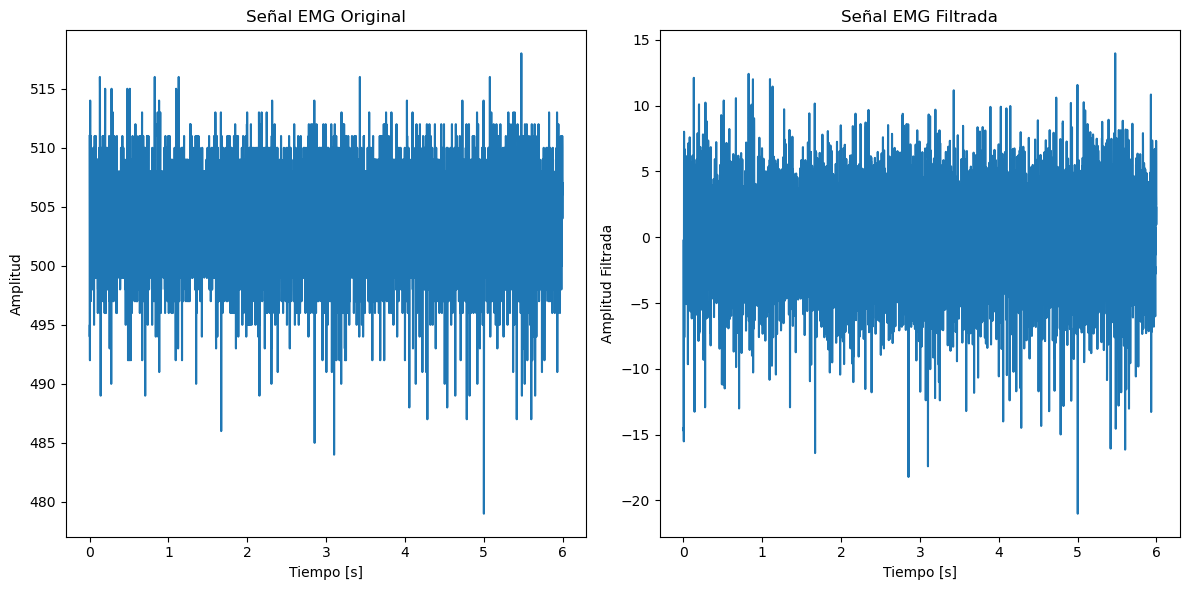

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


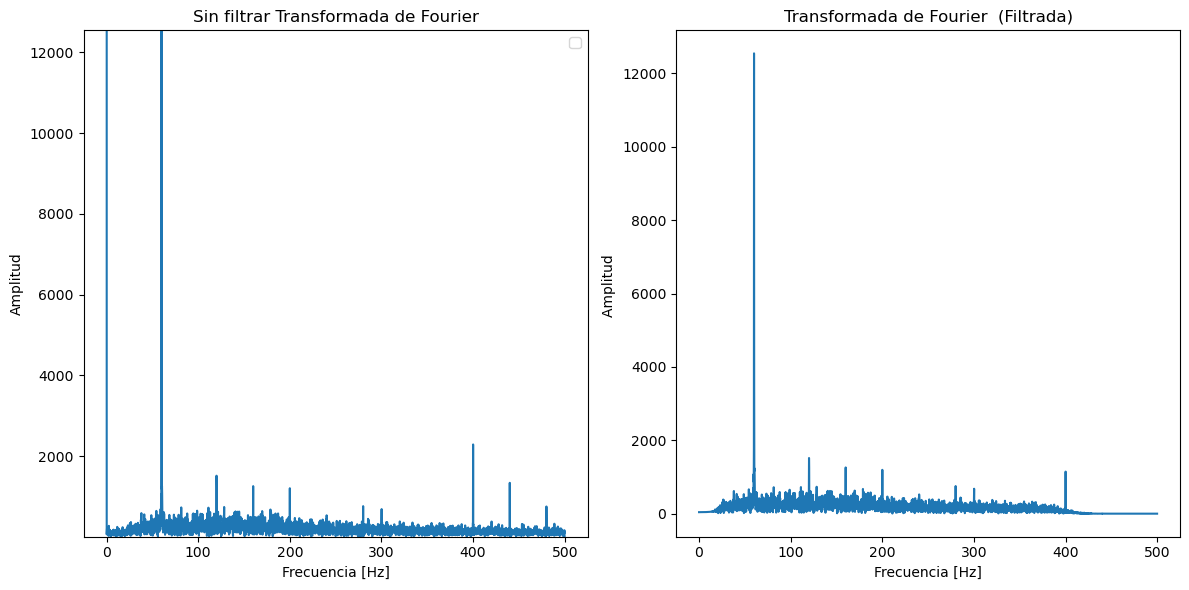

In [61]:
# medicion 3 reposo
grafica(sample[0:6000],amplitude[0:6000],filtrada[0:6000])


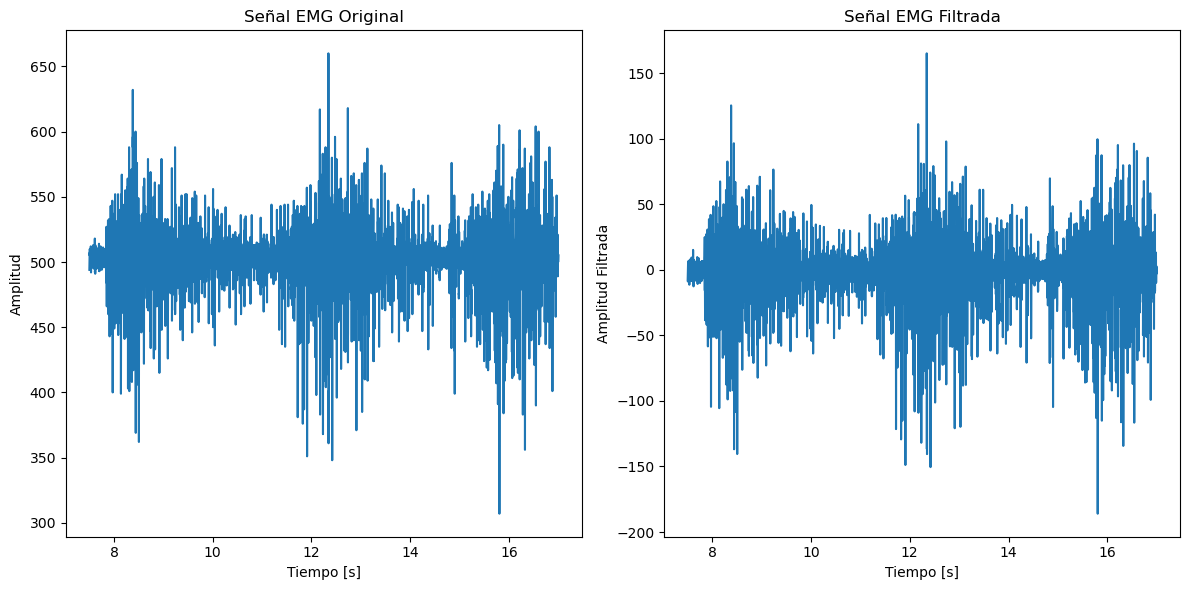

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


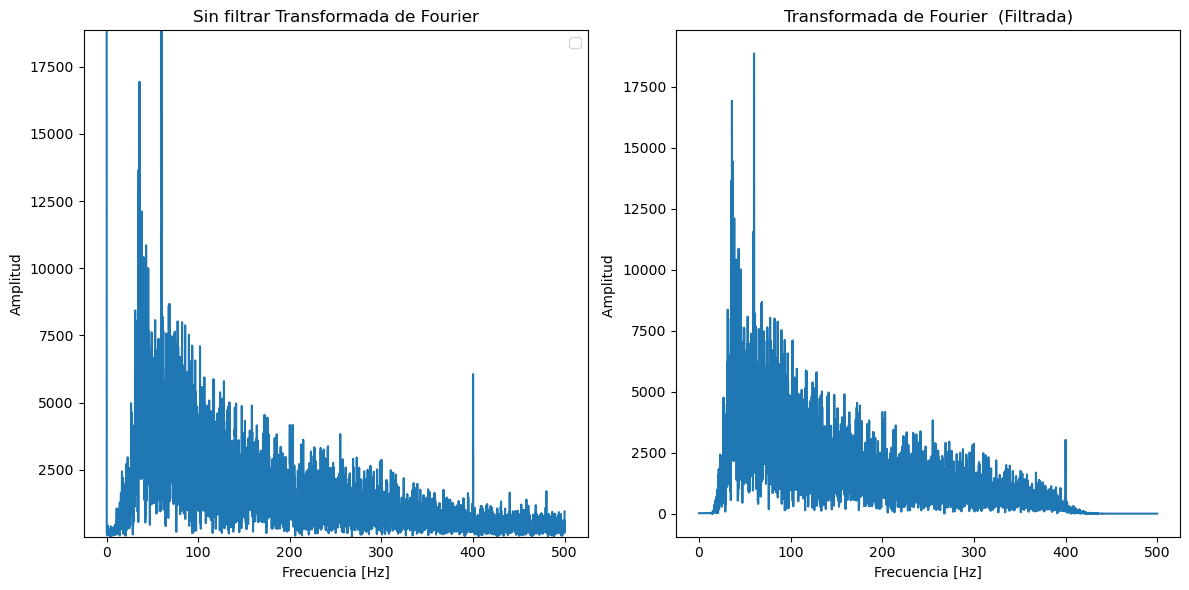

In [65]:
# medicion 3 flexion
grafica(sample[7500:17000],amplitude[7500:17000],filtrada[7500:17000])

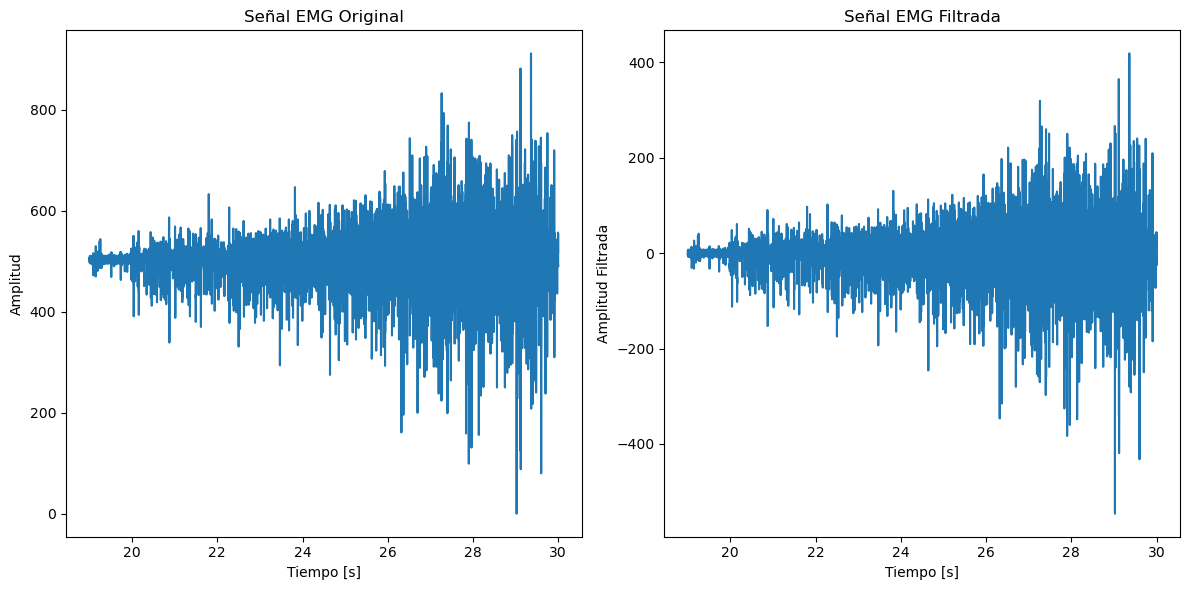

C:\Users\rogge\AppData\Local\Temp\ipykernel_72240\4259050912.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


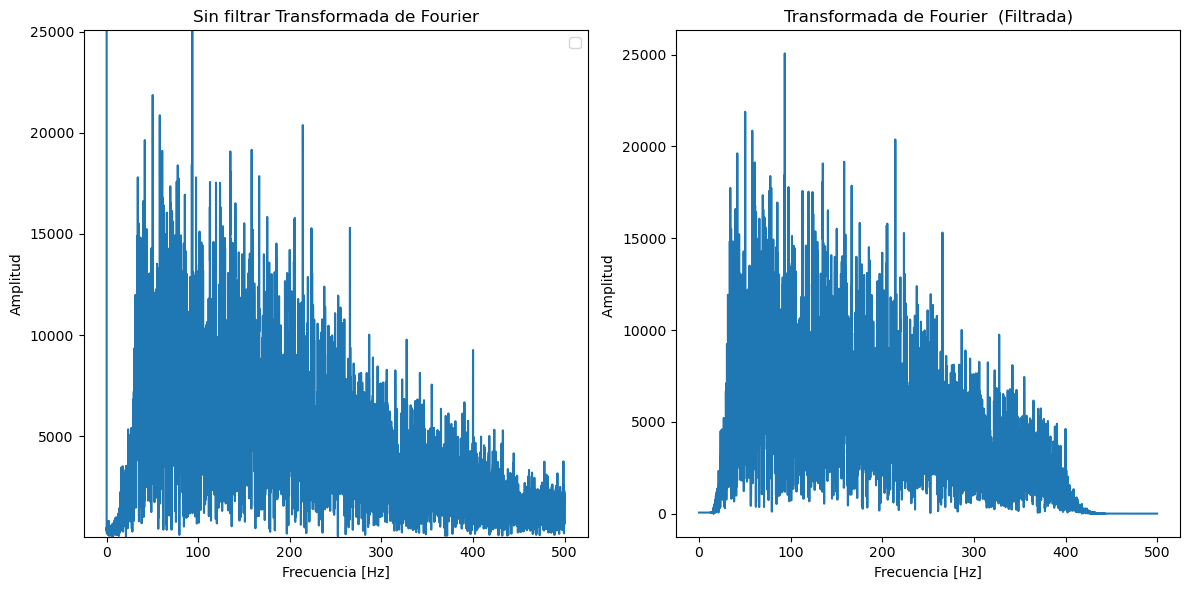

In [66]:
# medicion 3 maxima fuerza
grafica(sample[19000:30000],amplitude[19000:30000],filtrada[19000:30000])